# Frequency of Data Transmission with Human Readable Data Notebook

This was where most initial findings and the data analysis of the investigation with Raspberry Pi Pico data transmission frequency took place.
Documented to the best of my ability with the time I have and with maybe some memes


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.fft import rfft
import numpy as np
from scipy import stats
import seaborn as sns
import os
import h5py

## Analysis of Purely the First Dataset

Plotting temperature evolution with time

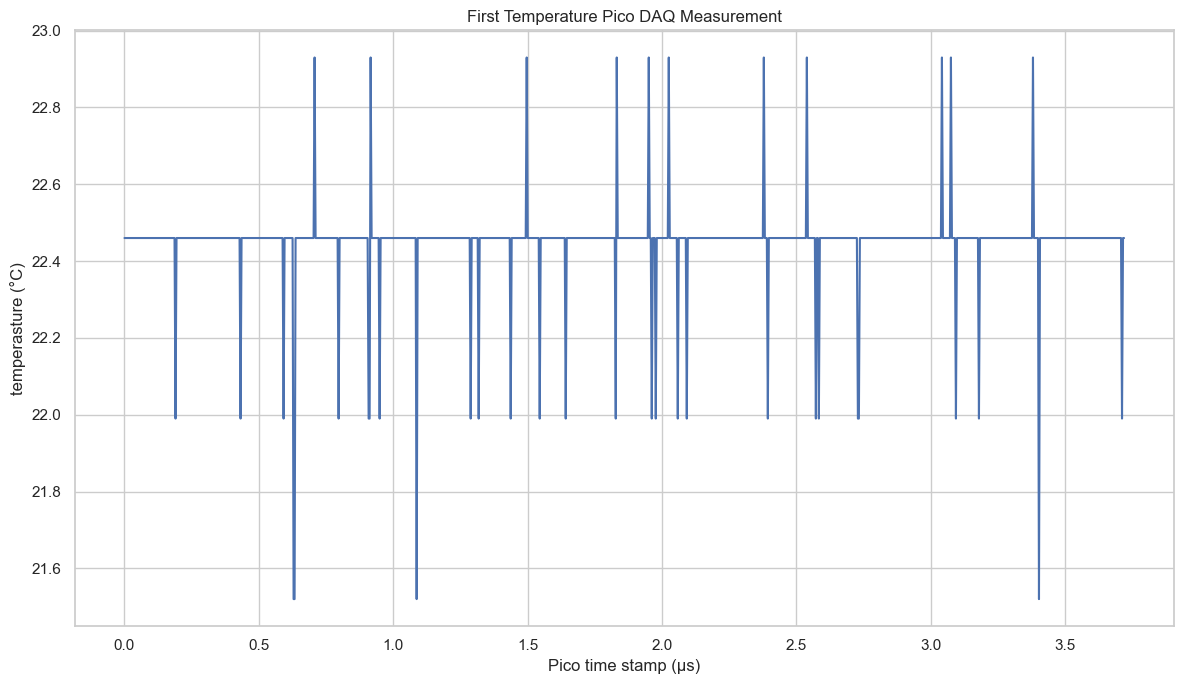

In [87]:

data = pd.read_csv("../../temp_data_1000_entries.csv", sep = ",", names = ["pico_time_stamp_us", "temp", "DAQ_time_stamp"])
data["pico_time_stamp_std_us"] = (data["pico_time_stamp_us"] - data["pico_time_stamp_us"][0]) / 1E6
data["computer_time_stamp_std_us"] = (data["pico_time_stamp_us"] - data["pico_time_stamp_us"][0]) / 1E6

plt.figure(figsize=(12,7))
plt.plot(data["pico_time_stamp_std_us"], data["temp"])
plt.xlabel("Pico time stamp (µs)")
plt.ylabel("temperasture (°C)")
plt.title("First Temperature Pico DAQ Measurement")
plt.tight_layout()

plt.savefig("first_graph.png", dpi = 1000, bbox_inches = "tight")

plt.show()


The method below would be the method used to calculate the frequency of data transmission. This code gets recycled frequently and if time allowed, generalised into a function.

,pico_time_stamp_us,temp,DAQ_time_stamp,pico_time_stamp_std_us,computer_time_stamp_std_us
0,16385683,22.46,NaN,0.000000,0.000000
1,16389416,22.46,NaN,0.003733,0.003733
2,16393141,22.46,NaN,0.007458,0.007458
3,16396866,22.46,NaN,0.011183,0.011183
4,16400588,22.46,NaN,0.014905,0.014905
...,...,...,...,...,...
995,20090714,22.46,NaN,3.705031,3.705031
996,20094439,22.46,NaN,3.708756,3.708756
997,20098163,21.99,NaN,3.712480,3.712480
998,20101887,22.46,NaN,3.716204,3.716204


mean time difference between measurements: 3723.6536536536537 ± 0.04260994432071576 µs
percentage error: 0.0011443047147767578


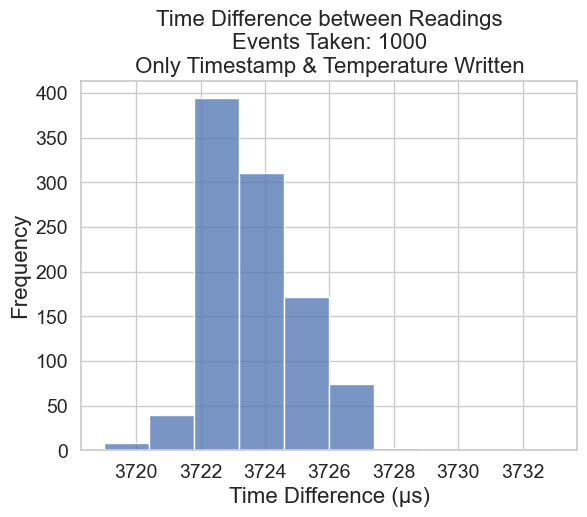

In [88]:
time_diffs = np.diff(data["pico_time_stamp_us"])
display(data)

print(f"mean time difference between measurements: {time_diffs.mean()} ± {stats.sem(time_diffs)} µs")
print(f"percentage error: {stats.sem(time_diffs)/time_diffs.mean() * 100}")

sns.histplot(time_diffs, kde=False, bins = 10)
plt.title("Time Difference between Readings\nEvents Taken: 1000\nOnly Timestamp & Temperature Written", fontsize = 16)
plt.xlabel("Time Difference (µs)", fontsize = 16)
plt.ylabel("Frequency", fontsize = 16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.grid(True)
plt.savefig("Send_Delay_Init.pdf", bbox_inches = "tight", format = "pdf")

In [57]:
print(f"mean frequency measurements: {1/time_diffs.mean() * 1E6} ± {(1/time_diffs.mean()**2)*stats.sem(time_diffs) * 1E6} Hz")
print(f"percentage error: {(1/time_diffs.mean()**2)*(stats.sem(time_diffs))/(1/time_diffs.mean()) * 100}")

mean frequency measurements: 268.55344052173024 ± 0.0030730696815853558 Hz
percentage error: 0.001144304714776758


Below would have been an attempt to find the frequency at which noise occured if there was time. Hence why `scipy.fft.rfft` was imported.

In [58]:
print(data["temp"].mode())

0    22.46
Name: temp, dtype: float64


In [59]:
display(data[(data["temp"] < 22.46)])
display(data[(data["temp"] > 22.46)])
display(data[(data["temp"] == 21.52)])

print((len(data[(data["temp"] == 21.52)]) / len(data[(data["temp"] < 22.46)]))* 100)
len(data[(data["temp"] == 21.52)])

,pico_time_stamp_us,temp,DAQ_time_stamp,pico_time_stamp_std_us,computer_time_stamp_std_us
51,16575602,21.99,NaN,0.189919,0.189919
116,16817637,21.99,NaN,0.431954,0.431954
159,16977752,21.99,NaN,0.592069,0.592069
169,17014985,21.52,NaN,0.629302,0.629302
170,17018708,21.52,NaN,0.633025,0.633025
214,17182556,21.99,NaN,0.796873,0.796873
244,17294263,21.99,NaN,0.908580,0.908580
245,17297988,21.99,NaN,0.912305,0.912305
255,17335219,21.99,NaN,0.949536,0.949536
292,17473003,21.52,NaN,1.087320,1.087320


,pico_time_stamp_us,temp,DAQ_time_stamp,pico_time_stamp_std_us,computer_time_stamp_std_us
190,17093181,22.93,NaN,0.707498,0.707498
246,17301712,22.93,NaN,0.916029,0.916029
402,17882593,22.93,NaN,1.496910,1.496910
492,18217715,22.93,NaN,1.832032,1.832032
524,18336878,22.93,NaN,1.951195,1.951195
544,18411340,22.93,NaN,2.025657,2.025657
639,18765114,22.93,NaN,2.379431,2.379431
682,18925232,22.93,NaN,2.539549,2.539549
817,19427913,22.93,NaN,3.042230,3.042230
826,19461427,22.93,NaN,3.075744,3.075744


,pico_time_stamp_us,temp,DAQ_time_stamp,pico_time_stamp_std_us,computer_time_stamp_std_us
169,17014985,21.52,NaN,0.629302,0.629302
170,17018708,21.52,NaN,0.633025,0.633025
292,17473003,21.52,NaN,1.087320,1.087320
914,19789110,21.52,NaN,3.403427,3.403427


13.793103448275861


4

## Reference Time Correct Quick Analysis

This was performed in week 1 and was then scrapped :'). It was however very insightful and was a first dive into making trigger system but on the wrong end of the system haha.

In [60]:
data = pd.read_csv("../../temp_data_1000_entries_270125_17;40;38.csv", sep = ",", names = ["pico_time_stamp_us", "temp", "DAQ_time_stamp"])
data["difference"] = (data["DAQ_time_stamp"] - (data["pico_time_stamp_us"])) / 1E6

display(data)

,pico_time_stamp_us,temp,DAQ_time_stamp,difference
0,1737999640213941,20.12,1737999646720775,6.506834
1,1737999640218548,21.05,1737999646726170,6.507622
2,1737999640222996,21.52,1737999646730170,6.507174
3,1737999640227429,21.52,1737999646734173,6.506744
4,1737999640231857,21.05,1737999646738602,6.506745
...,...,...,...,...
995,1737999644617496,21.52,1737999651124448,6.506952
996,1737999644621923,21.05,1737999651129776,6.507853
997,1737999644626351,21.05,1737999651133442,6.507091
998,1737999644630774,21.05,1737999651138094,6.507320


In [61]:
DAQ_Delays = pd.read_csv("../../ref_time_write_times.csv", names = ["write times (s)"])
DAQ_Delays["write times (s)"] = DAQ_Delays["write times (s)"] / 1E6
display(DAQ_Delays)
mean_DAQ_writes = DAQ_Delays["write times (s)"].mean()
sem_DAQ_writes = stats.sem(DAQ_Delays["write times (s)"])
var_DAQ_writes = DAQ_Delays["write times (s)"].var()

print(f"mean time reference write times: {mean_DAQ_writes} ± {sem_DAQ_writes}")
print(f"percentage error: {sem_DAQ_writes/mean_DAQ_writes * 100}")

,write times (s)
0,8.790244
1,8.464921
2,8.310953
3,8.531580
4,8.345682


mean time reference write times: 8.488675999999998 ± 0.08525874167204199
percentage error: 1.0043820929440823


## Checking which quantity the Pico Sends is the Bottleneck process
### Temp Reading Analysis

In [62]:
start_end_temp = pd.read_csv("../../temp_data_1000_entries_300125_10;12;01.csv", names = ["Start_Temp_Timestamp_(µs)", "End_Temp_Timestamp_(µs)", "Temp"])
start_end_temp

,Start_Temp_Timestamp_(µs),End_Temp_Timestamp_(µs),Temp
0,376034750,376034756,21.99
1,376040586,376040592,21.52
2,376046419,376046425,21.99
3,376052251,376052257,21.52
4,376058080,376058087,21.99
...,...,...,...
995,381836213,381836219,22.46
996,381842043,381842050,21.99
997,381847874,381847880,22.46
998,381853706,381853712,21.99


In [63]:
start_end_temp["time_difference_(µs)"] = start_end_temp["End_Temp_Timestamp_(µs)"] - start_end_temp["Start_Temp_Timestamp_(µs)"]
display(start_end_temp)

,Start_Temp_Timestamp_(µs),End_Temp_Timestamp_(µs),Temp,time_difference_(µs)
0,376034750,376034756,21.99,6
1,376040586,376040592,21.52,6
2,376046419,376046425,21.99,6
3,376052251,376052257,21.52,6
4,376058080,376058087,21.99,7
...,...,...,...,...
995,381836213,381836219,22.46,6
996,381842043,381842050,21.99,7
997,381847874,381847880,22.46,6
998,381853706,381853712,21.99,6


In [64]:
start_end_time = pd.read_csv("../../temp_data_1000_entries_300125_10;27;00.csv", names = ["Start_Time_Timestamp_(µs)", "End_Time_Timestamp_(µs)", "Temp"])
start_end_time

,Start_Time_Timestamp_(µs),End_Time_Timestamp_(µs),Temp
0,5916628,5916628,22.46
1,5922117,5922117,22.46
2,5927597,5927597,22.46
3,5933077,5933077,22.46
4,5938555,5938555,22.46
...,...,...,...
995,11412134,11412135,22.46
996,11417788,11417788,22.46
997,11423444,11423444,22.46
998,11429099,11429100,22.93


In [65]:
start_end_time["time_difference_(µs)"] = start_end_time["End_Time_Timestamp_(µs)"] - start_end_time["Start_Time_Timestamp_(µs)"]
display(start_end_time)

,Start_Time_Timestamp_(µs),End_Time_Timestamp_(µs),Temp,time_difference_(µs)
0,5916628,5916628,22.46,0
1,5922117,5922117,22.46,0
2,5927597,5927597,22.46,0
3,5933077,5933077,22.46,0
4,5938555,5938555,22.46,0
...,...,...,...,...
995,11412134,11412135,22.46,1
996,11417788,11417788,22.46,0
997,11423444,11423444,22.46,0
998,11429099,11429100,22.93,1


7


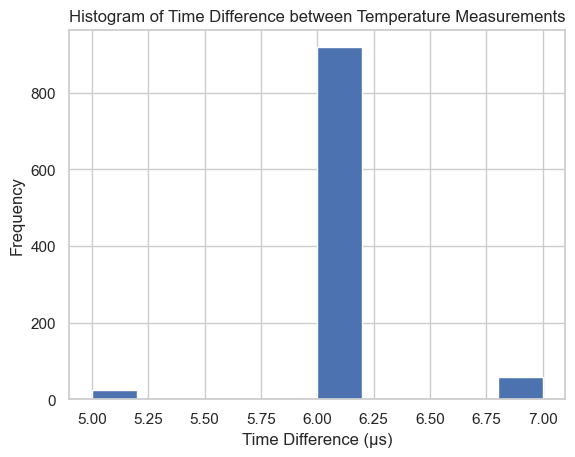

In [66]:
plt.hist(start_end_temp["time_difference_(µs)"])
plt.title("Histogram of Time Difference between Temperature Measurements")
plt.xlabel("Time Difference (µs)")
plt.ylabel("Frequency")

plt.savefig("Temp_Delay_Init.png", dpi = 1000, bbox_inches = "tight")

print(start_end_temp["time_difference_(µs)"].max())


1


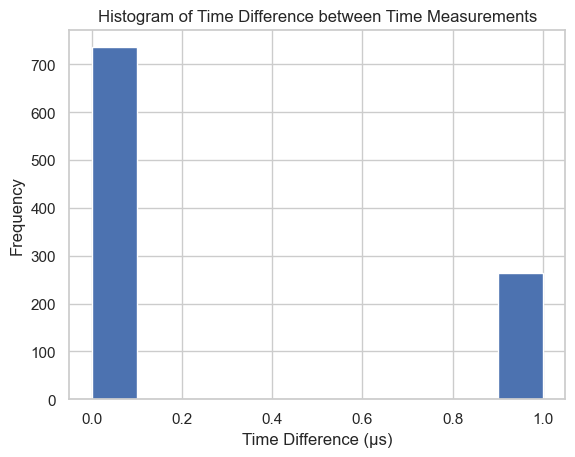

In [67]:
plt.hist(start_end_time["time_difference_(µs)"])

plt.title("Histogram of Time Difference between Time Measurements")
plt.xlabel("Time Difference (µs)")
plt.ylabel("Frequency")

print(start_end_time["time_difference_(µs)"].max())

plt.savefig("Time_Delay_Init.png", dpi = 1000, bbox_inches = "tight")


The temperature function the Pico had, had lots of code that would slow it down.

## Truncating What is Sent From the Pico

"Onboard Temperature @ time = temp" NO MORE HUMAN READBILITY

The same code from the initial readings was mostly recycled

,pico_time_stamp_us,temp
0,140061701,22.46
1,140063232,22.46
2,140064764,22.93
3,140066294,22.93
4,140067823,22.46
...,...,...
995,141586685,22.93
996,141588222,22.46
997,141589752,22.93
998,141591283,22.93


mean time difference between measurements: 1532.6446446446446 ± 0.09484628781427701 µs
percentage error: 0.006188406956934747
mean frequency measurements: 652.466965186087 ± 0.04037731106527681 Hz
percentage error: 0.006188406956934747


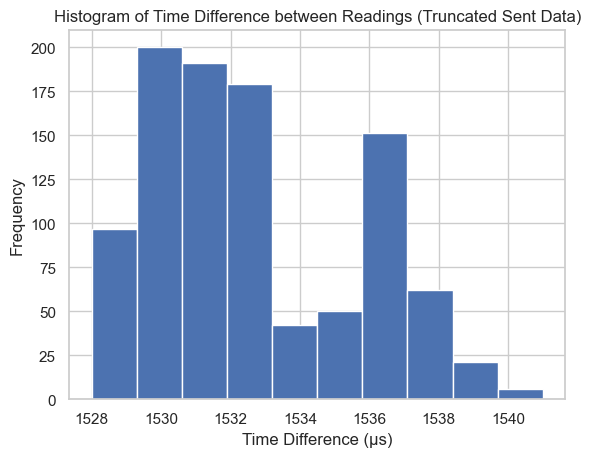

In [68]:

data = pd.read_csv("../../temp_data_1000_entries_050225_20;20;23.csv", sep = ",", names = ["pico_time_stamp_us", "temp"])

time_diffs = np.diff(data["pico_time_stamp_us"])
display(data)

print(f"mean time difference between measurements: {time_diffs.mean()} ± {stats.sem(time_diffs)} µs")
print(f"percentage error: {stats.sem(time_diffs)/time_diffs.mean() * 100}")

print(f"mean frequency measurements: {1/time_diffs.mean() * 1E6} ± {(1/time_diffs.mean()**2)*stats.sem(time_diffs) * 1E6} Hz")
print(f"percentage error: {(1/time_diffs.mean()**2)*(stats.sem(time_diffs))/(1/time_diffs.mean()) * 100}")

plt.hist(time_diffs)
plt.title("Histogram of Time Difference between Readings (Truncated Sent Data)")
plt.xlabel("Time Difference (µs)")
plt.ylabel("Frequency")

plt.savefig("Send_Delay_Init_Trunc.png", dpi = 1000, bbox_inches = "tight")


## Does changing the BAUD RATE in windows or in the Raspberry Pi Pico's code do anything?

Answer: not really

_same code recycled again_

,pico_time_stamp_us,temp
0,198644947,27.14
1,198646478,27.14
2,198648018,27.14
3,198649553,27.14
4,198651084,27.14
...,...,...
995,200170264,27.14
996,200171802,27.14
997,200173334,27.14
998,200174872,26.67


mean time difference between measurements: 1532.988988988989 ± 0.09381505780824008 µs
percentage error: 0.006119747661730526
mean frequency measurements: 652.32040620168 ± 0.03992036280551838 Hz
percentage error: 0.0061197476617305254


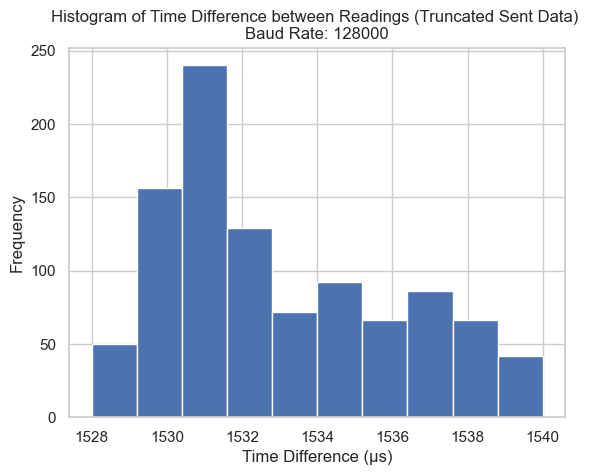

In [ ]:
data = pd.read_csv("../../temp_data_1000_entries_050225_21;28;24.csv", sep = ",", names = ["pico_time_stamp_us", "temp"])

time_diffs = np.diff(data["pico_time_stamp_us"])
display(data)

print(f"mean time difference between measurements: {time_diffs.mean()} ± {stats.sem(time_diffs)} µs")
print(f"percentage error: {stats.sem(time_diffs)/time_diffs.mean() * 100}")

print(f"mean frequency measurements: {1/time_diffs.mean() * 1E6} ± {(1/time_diffs.mean()**2)*stats.sem(time_diffs) * 1E6} Hz")
print(f"percentage error: {(1/time_diffs.mean()**2)*(stats.sem(time_diffs))/(1/time_diffs.mean()) * 100}")

plt.hist(time_diffs)
plt.title("Histogram of Time Difference between Readings (Truncated Sent Data) \nBaud Rate: 128000")
plt.xlabel("Time Difference (µs)")
plt.ylabel("Frequency")

plt.savefig("Send_Delay_128000.png", dpi = 1000, bbox_inches = "tight")

,pico_time_stamp_us,temp
0,111971090,27.14
1,111972629,27.14
2,111974162,27.14
3,111975700,27.14
4,111977234,27.14
...,...,...
995,113496307,27.14
996,113497845,27.14
997,113499377,27.61
998,113500908,27.14


mean time difference between measurements: 1532.8818818818818 ± 0.09583107261378239 µs
percentage error: 0.006251693215665966
mean frequency measurements: 652.365985807285 ± 0.040783920076026436 Hz
percentage error: 0.006251693215665966


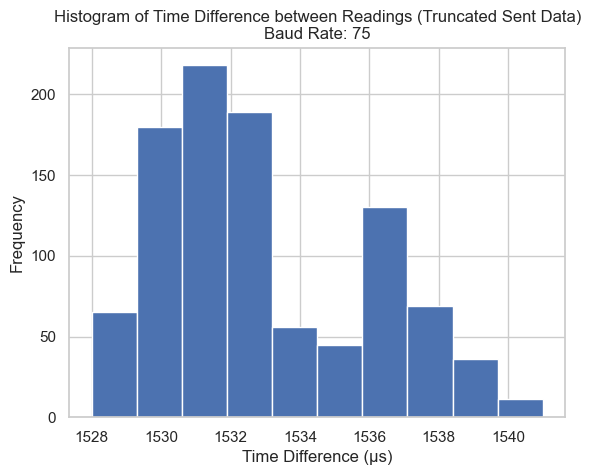

In [ ]:

data = pd.read_csv("../../temp_data_1000_entries_050225_21;41;45.csv", sep = ",", names = ["pico_time_stamp_us", "temp"])

time_diffs = np.diff(data["pico_time_stamp_us"])
display(data)

print(f"mean time difference between measurements: {time_diffs.mean()} ± {stats.sem(time_diffs)} µs")
print(f"percentage error: {stats.sem(time_diffs)/time_diffs.mean() * 100}")

print(f"mean frequency measurements: {1/time_diffs.mean() * 1E6} ± {(1/time_diffs.mean()**2)*stats.sem(time_diffs) * 1E6} Hz")
print(f"percentage error: {(1/time_diffs.mean()**2)*(stats.sem(time_diffs))/(1/time_diffs.mean()) * 100}")

plt.hist(time_diffs)
plt.title("Histogram of Time Difference between Readings (Truncated Sent Data)\nBaud Rate: 75")
plt.xlabel("Time Difference (µs)")
plt.ylabel("Frequency")

plt.savefig("Send_Delay_75.png", dpi = 1000, bbox_inches = "tight")


#### Does changing the CLOCK SPEEED in the Raspberry Pi Pico's code do anything?

Answer: No it made Data Transfer Frequency worse

,pico_time_stamp_us,temp
0,103014942,30.42
1,103018818,30.88
2,103022696,30.42
3,103026574,30.42
4,103030451,30.42
...,...,...
995,106872450,30.42
996,106876327,30.42
997,106880203,30.42
998,106884081,30.42


mean time difference between measurements: 3876.892892892893 ± 0.02949827527119131 µs
percentage error: 0.0007608741351938674
mean frequency measurements: 257.9385161331634 ± 0.0019625874539601013 Hz
percentage error: 0.0007608741351938674


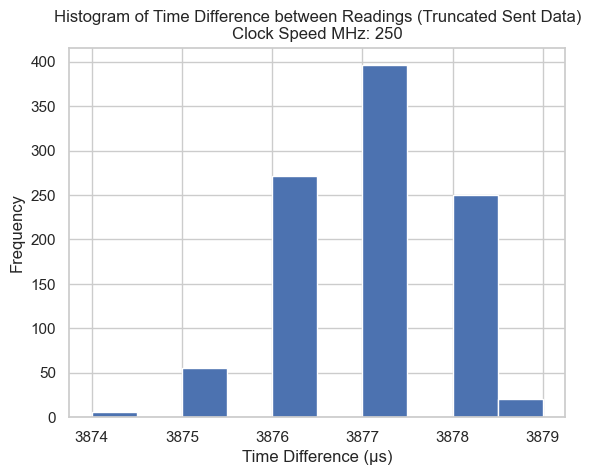

In [ ]:
data = pd.read_csv("../../temp_data_1000_entries_050225_22;03;15.csv", sep = ",", names = ["pico_time_stamp_us", "temp"])

time_diffs = np.diff(data["pico_time_stamp_us"])
display(data)

print(f"mean time difference between measurements: {time_diffs.mean()} ± {stats.sem(time_diffs)} µs")
print(f"percentage error: {stats.sem(time_diffs)/time_diffs.mean() * 100}")

print(f"mean frequency measurements: {1/time_diffs.mean() * 1E6} ± {(1/time_diffs.mean()**2)*stats.sem(time_diffs) * 1E6} Hz")
print(f"percentage error: {(1/time_diffs.mean()**2)*(stats.sem(time_diffs))/(1/time_diffs.mean()) * 100}")

plt.hist(time_diffs)
plt.title("Histogram of Time Difference between Readings (Truncated Sent Data)\nClock Speed MHz: 250")
plt.xlabel("Time Difference (µs)")
plt.ylabel("Frequency")

plt.savefig("Send_Delay_250MHz.png", dpi = 1000, bbox_inches = "tight")


,pico_time_stamp_us,temp
0,4991527,29.01
1,4994978,29.01
2,4998424,29.01
3,5001876,29.01
4,5005326,29.01
...,...,...
995,8423929,29.01
996,8427379,29.01
997,8430825,29.01
998,8434274,29.01


mean time difference between measurements: 3449.645645645646 ± 0.04687371972726902 µs
percentage error: 0.0013587981068848593
mean frequency measurements: 289.8848469442829 ± 0.003938949812424987 Hz
percentage error: 0.0013587981068848593


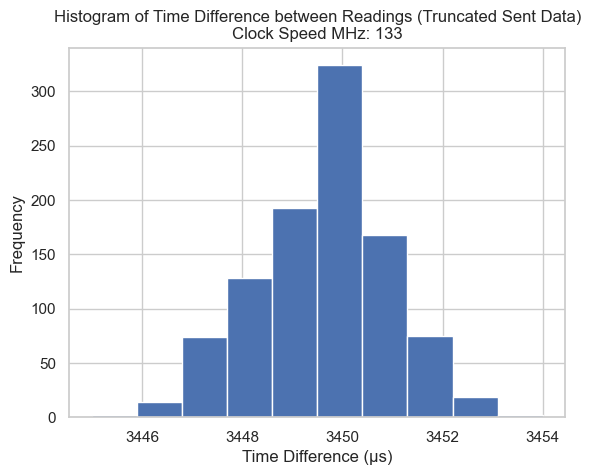

In [ ]:
data = pd.read_csv("../../temp_data_1000_entries_050225_22;28;21.csv", sep = ",", names = ["pico_time_stamp_us", "temp"])

time_diffs = np.diff(data["pico_time_stamp_us"])
display(data)

print(f"mean time difference between measurements: {time_diffs.mean()} ± {stats.sem(time_diffs)} µs")
print(f"percentage error: {stats.sem(time_diffs)/time_diffs.mean() * 100}")

print(f"mean frequency measurements: {1/time_diffs.mean() * 1E6} ± {(1/time_diffs.mean()**2)*stats.sem(time_diffs) * 1E6} Hz")
print(f"percentage error: {(1/time_diffs.mean()**2)*(stats.sem(time_diffs))/(1/time_diffs.mean()) * 100}")

plt.hist(time_diffs)
plt.title("Histogram of Time Difference between Readings (Truncated Sent Data)\nClock Speed MHz: 133")
plt.xlabel("Time Difference (µs)")
plt.ylabel("Frequency")

plt.savefig("Send_Delay_133MHz.png", dpi = 1000, bbox_inches = "tight")


,pico_time_stamp_us,temp
0,3594937,26.67
1,3598406,26.67
2,3601873,26.67
3,3605343,26.67
4,3608812,26.67
...,...,...
995,7046491,27.14
996,7049959,27.14
997,7053427,27.14
998,7056896,27.14


mean time difference between measurements: 3468.898898898899 ± 0.05982909150504766 µs
percentage error: 0.001724728602613315
mean frequency measurements: 288.2759138115616 ± 0.004971977139952911 Hz
percentage error: 0.001724728602613315


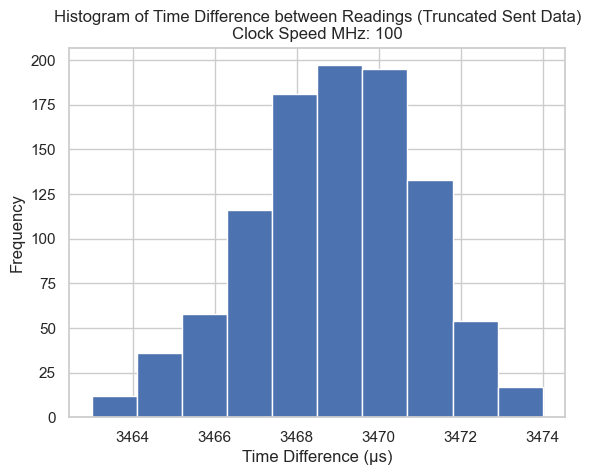

In [73]:
data = pd.read_csv("../../temp_data_1000_entries_050225_22;32;21.csv", sep = ",", names = ["pico_time_stamp_us", "temp"])

time_diffs = np.diff(data["pico_time_stamp_us"])
display(data)

print(f"mean time difference between measurements: {time_diffs.mean()} ± {stats.sem(time_diffs)} µs")
print(f"percentage error: {stats.sem(time_diffs)/time_diffs.mean() * 100}")

print(f"mean frequency measurements: {1/time_diffs.mean() * 1E6} ± {(1/time_diffs.mean()**2)*stats.sem(time_diffs) * 1E6} Hz")
print(f"percentage error: {(1/time_diffs.mean()**2)*(stats.sem(time_diffs))/(1/time_diffs.mean()) * 100}")

plt.hist(time_diffs)
plt.title("Histogram of Time Difference between Readings (Truncated Sent Data)\nClock Speed MHz: 100")
plt.xlabel("Time Difference (µs)")
plt.ylabel("Frequency")

plt.savefig("Send_Delay_100MHz.png", dpi = 1000, bbox_inches = "tight")


,pico_time_stamp_us,temp
0,87000354,27.14
1,87001797,27.14
2,87003249,27.14
3,87004694,27.61
4,87006144,27.61
...,...,...
995,88437528,27.61
996,88438971,27.61
997,88440413,27.61
998,88441855,27.61


mean time difference between measurements: 1444.3873873873874 ± 0.0919261411489127 µs
percentage error: 0.006364368863341365
mean frequency measurements: 692.3350402614656 ± 0.04406275573240261 Hz
percentage error: 0.006364368863341364


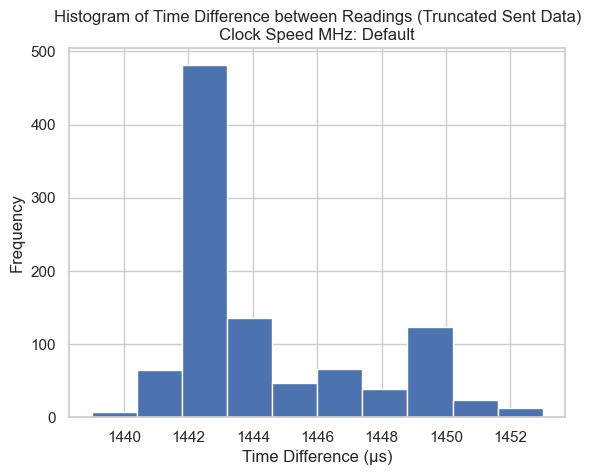

In [74]:
data = pd.read_csv("../../temp_data_1000_entries_050225_22;41;03.csv", sep = ",", names = ["pico_time_stamp_us", "temp"])

time_diffs = np.diff(data["pico_time_stamp_us"])
display(data)

print(f"mean time difference between measurements: {time_diffs.mean()} ± {stats.sem(time_diffs)} µs")
print(f"percentage error: {stats.sem(time_diffs)/time_diffs.mean() * 100}")

print(f"mean frequency measurements: {1/time_diffs.mean() * 1E6} ± {(1/time_diffs.mean()**2)*stats.sem(time_diffs) * 1E6} Hz")
print(f"percentage error: {(1/time_diffs.mean()**2)*(stats.sem(time_diffs))/(1/time_diffs.mean()) * 100}")

plt.hist(time_diffs)
plt.title("Histogram of Time Difference between Readings (Truncated Sent Data)\nClock Speed MHz: Default")
plt.xlabel("Time Difference (µs)")
plt.ylabel("Frequency")

plt.savefig("Send_Delay_DefaultMHz.png", dpi = 1000, bbox_inches = "tight")


## Data Transfer Rates as a Func of Duration.

_The title says it all_

_My grade (hopefully not) standing smalllll_

In [ ]:
# Define a colour pallete
def get_colour(val):
    num_digits = len(str(val))
    if num_digits == 10:
        return "tab:red"
    elif num_digits == 9:
        return "tab:orange"
    elif num_digits == 8:
        return "tab:olive"
    elif num_digits == 7:
        return "tab:blue"
    else:
        return "tab:green"

,pico_time_stamp_us,temp
0,531925,11.22
1,533191,11.22
2,534457,11.22
3,535726,11.22
4,537001,11.22
...,...,...
999995,1556217285,13.56
999996,1556218904,13.56
999997,1556220522,13.56
999998,1556222147,13.56


mean time difference between measurements: 1555.6933956933956 ± 0.05360001946616898 µs
percentage error: 0.0034454102340827036
mean frequency measurements: 642.8001833576501 ± 0.02214710330210686 Hz
percentage error: 0.0034454102340827036
Duration taken for the pico to read all 1,000,000 events was: 25.928197333333333 Minutes


Finding the Scale Factor between adding a new digit
Scale factors between digit transitions: [1.07030016 1.06420664 1.06171983 1.05813194]
Average scale factor: 1.0636 ± 0.0026


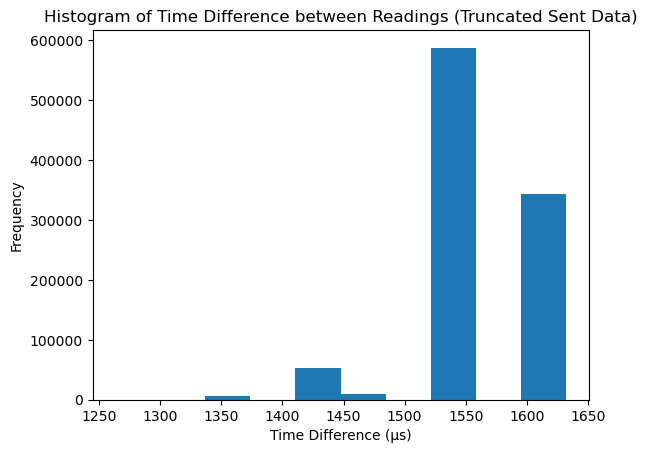

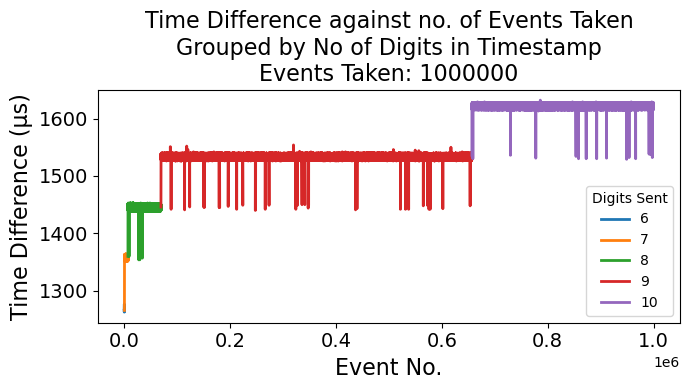

In [19]:
rates_df = pd.read_csv("../../temp_data_1000000_entries_080225_17;25;02.csv", sep = ",", names = ["pico_time_stamp_us", "temp"])
time_diffs = np.diff(rates_df["pico_time_stamp_us"]) #Find difference
display(rates_df)


rates_df["num_digits"] = rates_df["pico_time_stamp_us"].astype(str).str.len() #Extract no. of digits
rates_df["Event No."] = np.arange(0,len(rates_df))

digits = pd.DataFrame({
    "Event No.": np.arange(1, len(time_diffs) + 1),
    "Time Difference (µs)": time_diffs,
    "Digits Sent": rates_df["num_digits"].iloc[1:]
})

print(f"mean time difference between measurements: {time_diffs.mean()} ± {stats.sem(time_diffs)} µs")
print(f"percentage error: {stats.sem(time_diffs)/time_diffs.mean() * 100}")

print(f"mean frequency measurements: {1/time_diffs.mean() * 1E6} ± {(1/time_diffs.mean()**2)*stats.sem(time_diffs) * 1E6} Hz")
print(f"percentage error: {(1/time_diffs.mean()**2)*(stats.sem(time_diffs))/(1/time_diffs.mean()) * 100}")

# Wanted to observe the histogram, this would not show evolution with time
plt.figure(1)
plt.hist(time_diffs)
plt.title("Histogram of Time Difference between Readings (Truncated Sent Data)")
plt.xlabel("Time Difference (µs)")
plt.ylabel("Frequency")
plt.savefig("Send_Delay_Over_1000000.png", dpi = 1000, bbox_inches = "tight")

# More suitable line plot for showing evolution in time
plt.figure(2, figsize = (7,4))
sns.lineplot(data=digits, x="Event No.", y="Time Difference (µs)", hue="Digits Sent", palette="tab10", linewidth=2)
plt.title(f"Time Difference against no. of Events Taken\nGrouped by No of Digits in Timestamp\nEvents Taken: {1000000}", fontsize = 16)
plt.xlabel("Event No.", fontsize = 16)
plt.ylabel("Time Difference (µs)", fontsize = 16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.tight_layout()
plt.savefig("Send_Delay_Over_1000000_Against_Events.pdf", format = "pdf", bbox_inches = "tight") #graph is very pretty ngl

time_record_1000000 = rates_df["pico_time_stamp_us"].iloc[-1] - rates_df["pico_time_stamp_us"].iloc[0]
print(f"Duration taken for the pico to read all 1,000,000 events was: {time_record_1000000 / 6E7} Minutes")

print("\n===================================================\n")
print("Finding the Scale Factor between adding a new digit")
avg_time_diff_per_digit = digits.groupby("Digits Sent")["Time Difference (µs)"].median()
scale_factors = avg_time_diff_per_digit.values[1:] / avg_time_diff_per_digit.values[:-1]
avg_scale_factor = scale_factors.mean()
sem_scale_factor = stats.sem(scale_factors)
print(f"Scale factors between digit transitions: {scale_factors}")
print(f"Average scale factor: {avg_scale_factor:.4f} ± {sem_scale_factor:.4f}")

## Plotting Write Times wrt Data Size

These write times are based off of the overall system itself. This changed dynamically throughout the investigation so plots without certain data types will appear in the lab book.

_This did not get included in the report anyway_ although this was very insightful especially since the overhead from converting the Pico's message into relevant Python objects can be observed from these figures

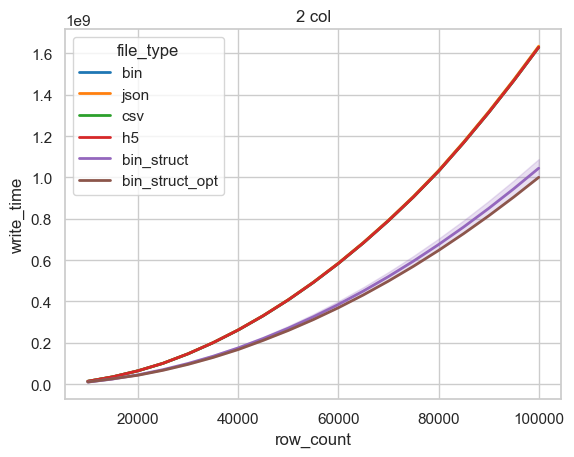

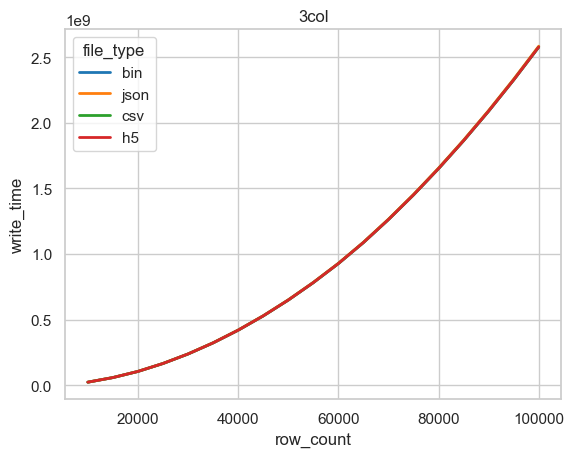

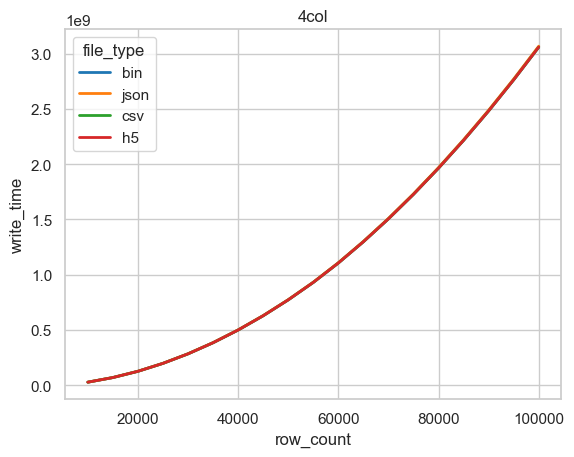

In [77]:
write_2col_df = pd.read_csv("../../file_write_times.csv", sep = ",", names = ["file_type", "row_count", "write_time"])
write_3col_df = pd.read_csv("../../file_write_times_clk.csv", sep = ",", names = ["file_type", "row_count", "write_time"])
write_4col_df = pd.read_csv("../../file_write_times_clk_volt.csv", sep = ",", names = ["file_type", "row_count", "write_time"])

plt.figure(1)
sns.lineplot(data=write_2col_df, x="row_count", y="write_time", hue="file_type", palette="tab10", linewidth=2)
plt.title("2 col")
plt.savefig("wirte_time_2col_updated.png", dpi = 1000, bbox_inches = "tight")
plt.figure(2)
sns.lineplot(data=write_3col_df, x="row_count", y="write_time", hue="file_type", palette="tab10", linewidth=2)
plt.title("3col")
plt.savefig("wirte_time_3col_updated.png", dpi = 1000, bbox_inches = "tight")
plt.figure(3)
sns.lineplot(data=write_4col_df, x="row_count", y="write_time", hue="file_type", palette="tab10", linewidth=2)
plt.title("4col")
plt.savefig("wirte_time_4col_updated.png", dpi = 1000, bbox_inches = "tight")


#### Bringing all the data together

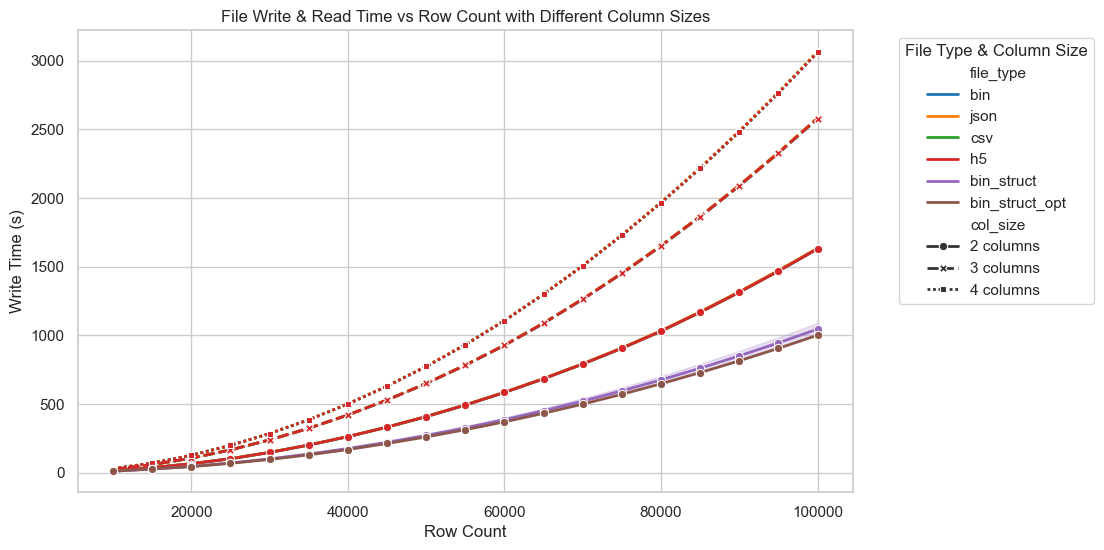

In [ ]:
write_2col_df = pd.read_csv("../../file_write_times.csv", sep=",", names=["file_type", "row_count", "write_time"])
write_2col_df["col_size"] = "2 columns"

write_3col_df = pd.read_csv("../../file_write_times_clk.csv", sep=",", names=["file_type", "row_count", "write_time"])
write_3col_df["col_size"] = "3 columns"

write_4col_df = pd.read_csv("../../file_write_times_clk_volt.csv", sep=",", names=["file_type", "row_count", "write_time"])
write_4col_df["col_size"] = "4 columns"

for df in [write_2col_df, write_3col_df, write_4col_df]:
    df["write_time"] = df["write_time"] / 1e6
    
df_combined = pd.concat([write_2col_df, write_3col_df, write_4col_df])

palette = sns.color_palette("tab10", len(df_combined["file_type"].unique()))

plt.figure(figsize=(10, 6))
sns.lineplot(
    data=df_combined,
    x="row_count",
    y="write_time",
    hue="file_type",
    style="col_size",
    markers=True,
    palette=palette,
    linewidth=2
)

plt.xlabel("Row Count")
plt.ylabel("Write Time (s)")
plt.title("File Write & Read Time vs Row Count with Different Column Sizes")

plt.legend(title="File Type & Column Size", loc="upper left")

plt.savefig("write_time_combined.png", dpi=1000, bbox_inches="tight")
plt.show()


### Histogram of Optimised DAQ reading for CSV Specifically

Not much benefit, except for a nice report figure

,Category,Time Difference (µs)
0,colsize2,1620
1,colsize2,1624
2,colsize2,1621
3,colsize2,1618
4,colsize2,1624
...,...,...
3134938,colsize4,2961
3134939,colsize4,2961
3134940,colsize4,2962
3134941,colsize4,2959


colsize2: Mean = 1536.00 ± 0.05 µs
colsize3: Mean = 2504.00 ± 0.05 µs
colsize4: Mean = 2960.00 ± 0.05 µs


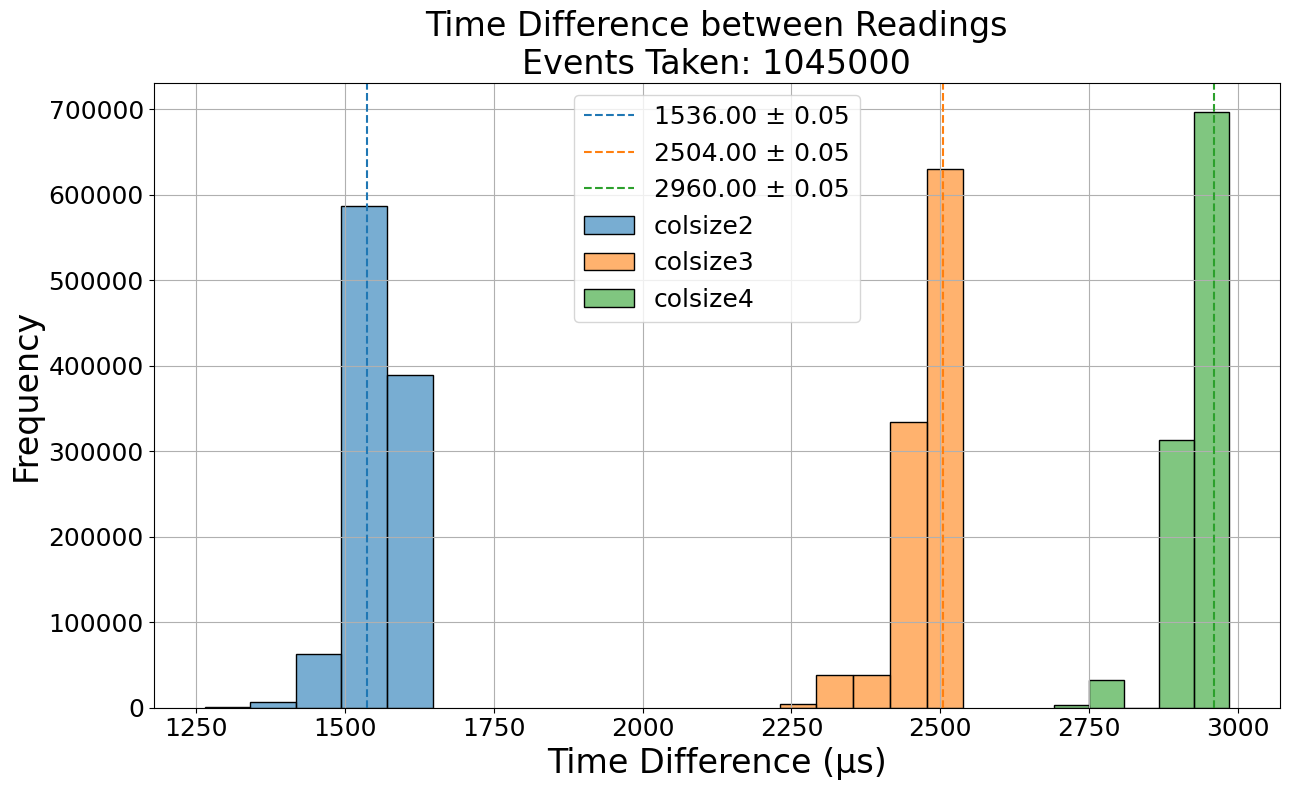

In [17]:
folders = {
    "csv2_colsize2": "colsize2",
    "csv2_colsize3": "colsize3",
    "csv2_colsize4": "colsize4"
}

column_names = {
    "colsize2": ["pico_time_stamp_us", "temp"],
    "colsize3": ["pico_time_stamp_us", "temp", "clock_speed"],
    "colsize4": ["pico_time_stamp_us", "temp", "clock_speed", "volt"]
}


all_data = []

for folder, category in folders.items():
    folder_path = f"../../{folder}" 

    for file in os.listdir(folder_path):
        if file.endswith(".csv"):
            filepath = os.path.join(folder_path, file)
            data = pd.read_csv(filepath, sep=",", names=column_names[category])
            data["pico_time_stamp_std_us"] = (data["pico_time_stamp_us"] - data["pico_time_stamp_us"][0]) / 1E6
            time_diffs = np.diff(data["pico_time_stamp_us"])

            all_data.extend([(category, td) for td in time_diffs])

df_time_diffs = pd.DataFrame(all_data, columns=["Category", "Time Difference (µs)"])
display(df_time_diffs)

palette = {"colsize2": "tab:blue",
           "colsize3": "tab:orange",
           "colsize4": "tab:green"}
plt.figure(figsize=(13,8))
for category in df_time_diffs["Category"].unique():
    subset = df_time_diffs[df_time_diffs["Category"] == category]["Time Difference (µs)"]
    print(f"{category}: Mean = {subset.median():.2f} ± {stats.sem(subset):.2f} µs")

    sns.histplot(subset, bins=5, kde=False, alpha=0.6, label=f'{category}')
    plt.axvline(subset.median(), color=palette[category], linestyle='--', label=f'{subset.median():.2f} ± {stats.sem(subset):.2f}')

# Plot histogram comparing categories
no_events = np.sum(np.arange(10000, 100001, 5000))
#sns.histplot(df_time_diffs, x="Time Difference (µs)", hue="Category", bins=30, kde=True, alpha=0.6,)
plt.title(f"Time Difference between Readings\nEvents Taken: {no_events}", fontsize = 24)
plt.xlabel("Time Difference (µs)", fontsize = 24)
plt.ylabel("Frequency", fontsize = 24)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
plt.grid(True)
plt.legend(fontsize = 18)
plt.tight_layout()
plt.savefig("Updated_Writing_CSV.pdf", bbox_inches = "tight", format = "pdf")
plt.show()
